In [1]:
# Fill in your name using the format below and student ID number
your_name = "BERIZZI, PAOLO"
student_id = "1518798"

# Assignment 1
We will study some more algorithms on the [Fashion-MNIST dataset](https://www.openml.org/d/40996).
As we saw in the first lab session, it contains 70,000 images of fashion products, classified into 10 
types of clothing, each represented by 28 by 28 pixel values. 

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openml
import time
import tqdm

In [3]:
# Download FMINST data. Takes a while the first time.
fmnist = openml.datasets.get_dataset(40996)
X, y, _, _ = fmnist.get_data(target=fmnist.default_target_attribute); 
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

In [4]:
# Plotting functions. Don't edit these.
%matplotlib inline
from IPython import display

def plot_live(X, y, evaluator, param_name, param_range, scale='log', ylim=(0,1), ylabel='score'):
    """ Renders a plot that updates with every evaluation from evaluator.
    Keyword arguments:
    X -- the data for training and testing
    y -- the correct labels
    evaluator -- a function with signature (X, y, param_value) that returns a dictionary of scores.
                 Examples: {"train": 0.9, "test": 0.95} or {"model_1": 0.9, "model_2": 0.7}
    param_name -- the parameter that is being varied on the X axis. Can be a hyperparameter, sample size,...
    param_range -- list of all possible values on the x-axis
    scale -- defines which scale to plot the x-axis on, either 'log' (logarithmic) or 'linear'
    ylim -- tuple with the lowest and highest y-value to plot (e.g. (0, 10))
    ylabel -- the y-axis title
    """
    # Plot interactively
    plt.ion()
    plt.ylabel(ylabel)
    plt.xlabel(param_name)
    
    # Make the scale look nice
    plt.xscale(scale)
    plt.xlim(param_range[0],param_range[-1])
    plt.ylim(ylim)
        
    # Start from empty plot, then fill it
    series = {}
    lines = {}
    xvals = []
    for i in param_range:
        scores = evaluator(X, y, i) 
        if i == param_range[0]: # initialize series
            for k in scores.keys():
                lines[k], = plt.plot(xvals, [], marker = '.', label = k)
                series[k] = []
        xvals.append(i)
        for k in scores.keys(): # append new data
            series[k].append(scores[k])
            lines[k].set_data(xvals, series[k])
        # refresh plot
        plt.legend(loc='best')
        plt.margins(0.1)
        display.display(plt.gcf())
        display.clear_output(wait=True)

### Question 1.1
Implement a function `evaluate_SVM` that evaluates an SVM with RBF kernel for a given gamma value and returns the train and test score

In [5]:
# Implement
from sklearn import svm
from sklearn.model_selection import cross_validate

def evaluate_SVM(X, y, gamma):
    """ Evaluate an SVM with 5-fold cross-validation on the provided (X, y) data. 
    Keyword arguments:
    X -- the data for training and testing
    y -- the correct labels
    gamma -- the value for the gamma parameter
    
    Returns: a dictionary with the mean train and test score, e.g. {"train": 0.9, "test": 0.95}
    """
    model = svm.SVC(gamma=gamma)
    scores = cross_validate(model, X, y, cv=5, return_train_score= True, n_jobs=-1)
    train_score = np.mean(scores['train_score'])
    test_score = np.mean(scores['test_score'])
    dict_score = {"train": np.mean(scores['train_score']), "test": np.mean(scores['test_score'])}
    return dict_score
    pass

Implement a function `plot_1` that plots the results of `evaluate_SVM` on a 1% stratified subsample of the FMNIST dataset for gamma values ranging from 1e-12 to 1e12 (25 values on a log scale). You can use the plotting functions `plot_live` defined above.

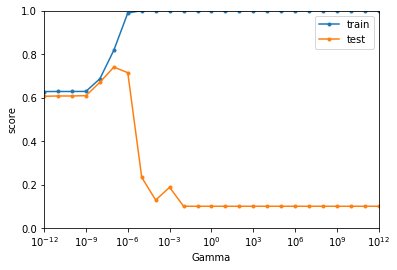

In [6]:
# Implement
from sklearn.model_selection import train_test_split

def plot_1():
    Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=0.01)
    gamma_range = np.logspace(-12, 12, num=25)
    plot_live(Xs, ys, evaluate_SVM, "Gamma", gamma_range)
    pass
plot_1()

### Question 1.2
Interpret the graph. Answer the following questions with multiple choice:  
- 'A': Underfitting
- 'B': Overfitting
- 'C': Neither underfitting nor overfitting
- 'D': No answer

For the gamma value 1e-9, is the model over- or underfitting?

In [7]:
# Fill in the correct answer, e.g. 'A'. Don't change the name of the variable
q_1_2_1 = 'A'

For the gamma value 1e3, is the model over- or underfitting?

In [8]:
# Fill in the correct answer, e.g. 'A'. Don't change the name of the variable
q_1_2_2 = 'B'

### Question 2.1
Implement a function `time_SVM` that measures the train and predict time of an SVM with RBF kernel for a given sample size (training set size). Use the default gamma value. The same data can be used for training and prediction since we only care about the running time.

In [9]:
# Implement
from time import perf_counter
from sklearn import svm
from sklearn.model_selection import train_test_split

def time_SVM(X, y, sample_size):
    """ Measure how long it takes to train a single SVM model and how fast it predicts. Run the algorithms on one core only.
    Keyword arguments:
    X -- the data for training and testing
    y -- the correct labels
    sample_size -- the percentage of the data that should be used for training and testing
    
    Returns: a dictionary with the measured time in seconds, e.g. {"fit": 12.1, "predict": 1.95}
    """
    X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, train_size=sample_size)
    svc_model = svm.SVC()
    
    train_start = time.perf_counter()
    model = svc_model.fit(X_train, y_train)
    train_end = time.perf_counter()
    
    predict_start = time.perf_counter()
    model.predict(X_train)
    predict_end = time.perf_counter()

    return {"fit": train_end-train_start, "predict": predict_end-predict_start}


Implement a function `plot_2` that plots the results of `time_SVM` for a sample size between 0.001 and 0.05 of the full FMNIST dataset. Use at least 10 different values, on a log scale. You can again use the plotting functions `plot_live` defined above.

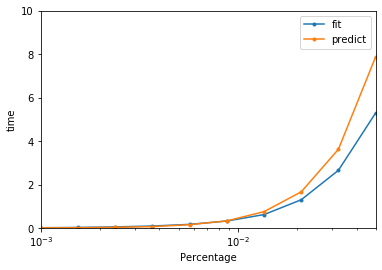

In [10]:
# Implement
def plot_2():
    percentages = np.logspace(np.log10(0.001), np.log10(0.05), num=10)
    plot_live(X, y, time_SVM, "Percentage", percentages, ylim=(0,10), ylabel="time")
    pass
plot_2()

### Question 2.2
Interpret the graph. What do you observe?  
- 'A': Fitting takes longer than predicting
- 'B': Predicting takes longer than fitting
- 'C': Fitting and predicting take exactly equally long
- 'D': No answer

In [11]:
# Fill in the correct answer, e.g. 'A'. Don't change the name of the variable
q_2_2 = 'B'

### Question 2.3
Run the plot again, but this time using a function `time_SVM_tuned` which is the same as `time_SVM` except that ot uses gamma=1e-5 rather than the default gamma value.

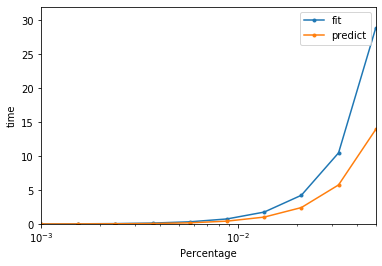

In [12]:
# Implement
from time import perf_counter
from sklearn import svm
from sklearn.model_selection import train_test_split

def time_SVM_tuned(X, y, sample_size):
    """ Measure how long it takes to train a single SVM model and how fast it predicts. 
    Run the algorithms on one core only. Use stratified sampling to subsample the data.
    Keyword arguments:
    X -- the data for training and testing
    y -- the correct labels
    sample_size -- the percentage of the data that should be used for training and testing
    
    Returns: a dictionary with the measured time in seconds, e.g. {"fit": 12.1, "predict": 1.95}
    """
    X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, train_size=sample_size)
    svc_model = svm.SVC(gamma=1e-5)
    
    train_start = time.perf_counter()
    model = svc_model.fit(X_train, y_train)
    train_end = time.perf_counter()
    
    predict_start = time.perf_counter()
    model.predict(X_train)
    predict_end = time.perf_counter()
   
    return {"fit": train_end-train_start, "predict": predict_end-predict_start}

# Implement
def plot_3():
    percentages = np.logspace(np.log10(0.001), np.log10(0.05), num=10)
    plot_live(X, y, time_SVM_tuned, "Percentage", percentages, ylim=(0,32), ylabel="time")
    pass
plot_3()

### Question 2.4
What do you observe? Which differences do you see? For each difference, explain what may cause the effect. Answer inside the multi-line string. Use less than 400 characters. 

In [13]:
# Fill in your answer
q_2_4_answer = """
Gamma influences the number of support vectors that are used and the running time for both fit and predictct: 
more support vectors require more running time and that is why the second case takes longer.
The default "scale" value lead to wider kernels and few support vectors (faster to fit than predict),
while a gamma=1e-5 leads to more support vectors that need more time to fit than predict.
"""

In [14]:
# Check your answer's length
print("Your answer is {} characters long".format(len(q_2_4_answer))) 

Your answer is 397 characters long
